# 猫狗大战
## 机器学习工程师 纳米学位 开题报告
陈睿嘉  
2018年1月7日


## 项目概述
　　猫狗大战源自Kaggle于2013年举办的一个娱乐竞赛项目，要求分辨给定测试图片是猫还是狗,属于图像分类问题，可以使用卷积神经网络（Convolutional Neural Network，CNN）构建深度模型解决。  
　　此外，项目可选输出猫狗面部坐标以及身体Mask，为图像目标检测（Object Localization and Detection）问题，可以在分类问题使用的模型卷积层基础上，使用RCNN（Region Convolutional Neural Network）、Fast RCNN、Faster RCNN、RFCN（Region-Based Fully Convolutional Networks）、SSD（Single Shot Multibox Dector）等模型解决。

### 领域背景
　　卷积神经网络是深度学习已经投入实际应用中且已经收获一定成功的先验网络结构之一，根据生物视觉神经中感受野（receptive field）概念的启发，使用卷积核取代传统DNN（Deep Neural Network）层与层之间的全连接权重，在极大降低了网络参数数量的基础上理论上相比全连接网络性能只是略微降低。由于计算机视觉相关问题数据结构的特殊性（图像、视频等），即往往每个像素只与附近区域的像素高度相关，非常适合使用CNN模型。  
　　使用卷积神经网络结构构建的较为成功的模型有VGG、ResNet、Inception、Xception等，都可以在更大型图像分类问题（如ImageNet）上达到较高的准确率，相比较而言，猫狗大战作为二分类问题相对更简单，训练模型需要的数据量更小，更适合初学者理解和实现图像分类问题的解决方案。  
　　图像目标检测模型大多以RCNN原理为基础，针对效率进行改进。//待补充

### 问题陈述
　　猫狗大战本质上属于监督学习，假设样本数据服从伯努利分布，学习一个条件概率分布模型$p(y|x)$，输入图片像素值向量$x$，输出样本$x$表示狗的概率$\hat{y} = p(y=dog|x)$，那么样本表示猫的概率就为$1-\hat{y}$。  
　　由于图像数据的特征不易提取，以及像素向量的高维度性，使用传统机器学习方法将带来维度灾难（Curse of dimensionality）,而深度网络的层次结构可以将模型容量（Capacity）增长为样本维度的指数级别，又由于高维度的图像数据向量并不是每种组合都有意义，模型需要学习的模式通常为数据向量的某种低维流形表示，并不需要样本维度指数级别的数据量，所以使用深度网络模型满足解决此问题的理论基础。然而，对于图像数据，DNN模型引入的参数太多，随着网络深度增加，几乎无法训练，由此，根据像素值往往只与附近区域的像素高度相关这一先验特征，CNN模型成为了当前最适合进行图像分类的先验模型。  
　　//RCNN

### 数据描述
　　训练数据集包括25000张图片，并在文件名中标注了图片为猫还是狗，猫狗数量各占一半，测试数据集包括12500张图片，没有标注类别，文件以数值ID命名。

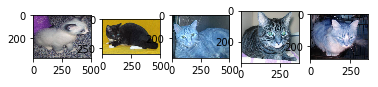

In [17]:
import random
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

cat_id_list = random.sample(range(12500), 5)
dog_id_list = random.sample(range(12500), 5)
cat_file = ["dog_vs_cat_data\\train\\cat.{}.jpg".format(i) for i in cat_id_list]
dog_file = ["dog_vs_cat_data\\train\\dog.{}.jpg".format(i) for i in dog_id_list]
cat_img = [cv2.imread(i, -1) for i in cat_file]
dog_img = [cv2.imread(i, -1) for i in dog_file]

for i in range(5):
    plt.subplot(251 + i)
    plt.imshow(cat_img[i])
    #plt.subplot(256 + i)
    #plt.imshow(dog_img[i])

plt.show()



　　如上图随机选取图片所示，图片尺寸参差不齐

### Solution Statement
_(approx. 1 paragraph)_

In this section, clearly describe a solution to the problem. The solution should be applicable to the project domain and appropriate for the dataset(s) or input(s) given. Additionally, describe the solution thoroughly such that it is clear that the solution is quantifiable (the solution can be expressed in mathematical or logical terms) , measurable (the solution can be measured by some metric and clearly observed), and replicable (the solution can be reproduced and occurs more than once).

### Benchmark Model
_(approximately 1-2 paragraphs)_

In this section, provide the details for a benchmark model or result that relates to the domain, problem statement, and intended solution. Ideally, the benchmark model or result contextualizes existing methods or known information in the domain and problem given, which could then be objectively compared to the solution. Describe how the benchmark model or result is measurable (can be measured by some metric and clearly observed) with thorough detail.

### Evaluation Metrics
_(approx. 1-2 paragraphs)_

In this section, propose at least one evaluation metric that can be used to quantify the performance of both the benchmark model and the solution model. The evaluation metric(s) you propose should be appropriate given the context of the data, the problem statement, and the intended solution. Describe how the evaluation metric(s) are derived and provide an example of their mathematical representations (if applicable). Complex evaluation metrics should be clearly defined and quantifiable (can be expressed in mathematical or logical terms).

### Project Design
_(approx. 1 page)_

In this final section, summarize a theoretical workflow for approaching a solution given the problem. Provide thorough discussion for what strategies you may consider employing, what analysis of the data might be required before being used, or which algorithms will be considered for your implementation. The workflow and discussion that you provide should align with the qualities of the previous sections. Additionally, you are encouraged to include small visualizations, pseudocode, or diagrams to aid in describing the project design, but it is not required. The discussion should clearly outline your intended workflow of the capstone project.

-----------

**Before submitting your proposal, ask yourself. . .**

- Does the proposal you have written follow a well-organized structure similar to that of the project template?
- Is each section (particularly **Solution Statement** and **Project Design**) written in a clear, concise and specific fashion? Are there any ambiguous terms or phrases that need clarification?
- Would the intended audience of your project be able to understand your proposal?
- Have you properly proofread your proposal to assure there are minimal grammatical and spelling mistakes?
- Are all the resources used for this project correctly cited and referenced?